In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from util import *

In [9]:
data_dir = './'
# Load and process data
aqms_data = load_aqms_data(data_dir + 'AQMS.xlsx')
bc_data = load_business_cycle_data(data_dir + 'Business Cycle.xls')

# Preprocess asset data
ar, ir = preprocess_asset_data(aqms_data)
print(ar.columns)

# Preprocess macro factors
mf = preprocess_macro_factors(bc_data, ar, ir)

/Users/moyuanchen/aqms/AQMS_GP/util.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


Index(['Equity_US', 'Equity_UK', 'Equity_Japan', 'Equity_Hong Kong',
       'Equity_Canada', 'Equity_Euro', 'Equity_Switzerland',
       'Equity_Australia', 'Equity_New Zealand', 'Currency_GBP Curncy',
       'Currency_JPY Curncy', 'Currency_EUR Curncy', 'Currency_HKD Curncy',
       'Currency_CHF Curncy', 'Currency_CAD Curncy', 'Currency_AUD Curncy',
       'Currency_NZD Curncy', 'IR Future_SFRA Comdty',
       'IR Future_SFR1YZ2 Comdty', 'IR Future_SFR1YZ3 Comdty',
       'IR Future_SFR1YZ4 Comdty', 'IR Future_SFR1YZ5 Comdty',
       'IR Future_SFR1YZ6 Comdty', 'IR Future_SFR2YZ2 Comdty',
       'Bond Yield 2Y_USGG2YR Index', 'Bond Yield 2Y_GUKG2 Index',
       'Bond Yield 2Y_GTJPY2Y Govt', 'Bond Yield 2Y_GTHKD2Y Govt',
       'Bond Yield 2Y_GTCAD2Y Govt', 'Bond Yield 2Y_GTCHF2Y Govt',
       'Bond Yield 2Y_GTAUD2Y Govt', 'Bond Yield 2Y_GTNZD2Y Govt',
       'Bond Yield 2Y_GTEURTR2Y Govt', 'Bond Yield 10Y_USGG10YR Index',
       'Bond Yield 10Y_GUKG10 Index', 'Bond Yield 10Y_GTJPY10Y

/Users/moyuanchen/aqms/AQMS_GP/util.py:184: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  assets_imputed = assets.ffill().bfill()
/Users/moyuanchen/aqms/AQMS_GP/util.py:194: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_log_returns = log_returns.resample('Y').sum()
/Users/moyuanchen/aqms/AQMS_GP/util.py:198: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_yields = assets_imputed[gb2y + gb10y].resample('Y').mean() / 100
/Users/moyuanchen/aqms/AQMS_GP/util.py:199: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ir_annual = ir_imputed.resample('Y').mean() / 100


In [11]:
mf.columns

Index(['Excess_Return_US', 'Excess_Return_UK', 'Excess_Return_JP',
       'Excess_Return_HK', 'Excess_Return_CA', 'Excess_Return_EU',
       'Excess_Return_AU', 'Excess_Return_NZ', 'Excess_Return_CH', 'GDP_AU',
       'GDP_CA', 'GDP_EU', 'GDP_HK', 'GDP_JP', 'GDP_NZ', 'GDP_CH', 'GDP_UK',
       'GDP_US', 'CPI_AU', 'CPI_CA', 'CPI_EU', 'CPI_HK', 'CPI_JP', 'CPI_NZ',
       'CPI_CH', 'CPI_UK', 'CPI_US', 'Currency_GBP Curncy',
       'Currency_JPY Curncy', 'Currency_EUR Curncy', 'Currency_HKD Curncy',
       'Currency_CHF Curncy', 'Currency_CAD Curncy', 'Currency_AUD Curncy',
       'Currency_NZD Curncy', 'Bond Yield 2Y_USGG2YR Index',
       'Bond Yield 2Y_GUKG2 Index', 'Bond Yield 2Y_GTJPY2Y Govt',
       'Bond Yield 2Y_GTHKD2Y Govt', 'Bond Yield 2Y_GTCAD2Y Govt',
       'Bond Yield 2Y_GTCHF2Y Govt', 'Bond Yield 2Y_GTAUD2Y Govt',
       'Bond Yield 2Y_GTNZD2Y Govt', 'Bond Yield 2Y_GTEURTR2Y Govt'],
      dtype='object')

Text(0.5, 1.0, 'GDP Growth Rates by Country')

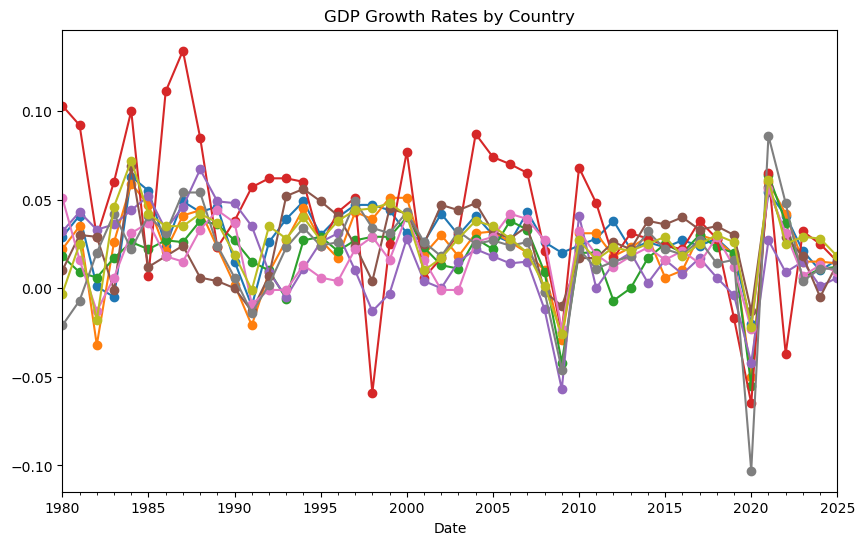

In [16]:
countries = ['AU','CA','EU','HK','JP','NZ','CH','UK','US']
for c in countries:
    _gdp = mf['GDP_' + c]
    _gdp.plot(label='GDP ' + c, marker = 'o',figsize=(10, 6))
plt.title('GDP Growth Rates by Country')

<Axes: xlabel='Date'>

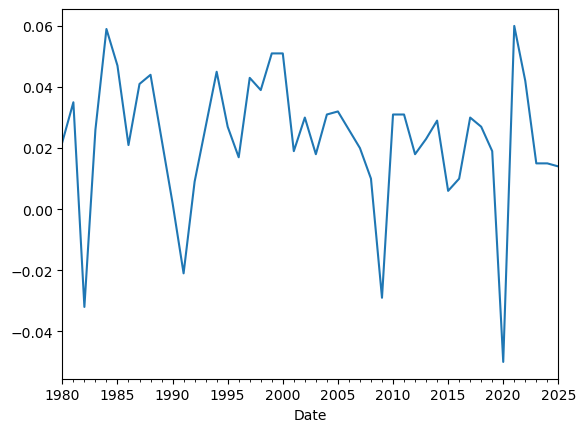